In [4]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
postulantes_educacion = pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_genero_edad = pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos_detalles = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

## Vemos como están conformados los data sets

In [3]:
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [4]:
postulantes_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [5]:
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [6]:
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


#### Este data set sólo posee los ids de los avisos que son online

In [7]:
avisos_detalles.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [8]:
postulantes_educacion.describe()

,idpostulante,nombre,estado
count,298231,298231,298231
unique,188752,7,3
top,YlMLGD,Secundario,Graduado
freq,9,110256,194474


#### Vemos que los ids de postulantes se repiten, deben tener mas de un tipo de educación y/o estado

In [9]:
postulantes_educacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 9.1+ MB


In [4]:
##Cambiamos la columna nombre por educacion
postulantes_educacion = postulantes_educacion.rename(index=str, columns={'nombre':'educacion'})
postulantes_educacion.head()

,idpostulante,educacion,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [15]:
##Agregamos una columna para indicar que el aviso es online en avisos_detalles
avisos_online['online'] = True
##unimos los avisos para agregar la columna online en avisos_detalles
avisos = avisos_detalles.join(avisos_online.set_index('idaviso'),on='idaviso',how='left')
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,online
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,NaN
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,NaN
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,NaN
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,True
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,NaN


#### Vemos que la nueva columna online de tipo booleano posee NaN por los ids de aviso de que no son online, entonces cambiamos ese valor por false

In [16]:
##Los que no son avisos online la fila en la columna online tiene valor False
avisos["online"].fillna(False,inplace=True)
avisos.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,online
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR,False
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste,False
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL,False
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A,True
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL,False


## Top 5 de avisos mas visitados

#### Analizamos las fechas de las visitas, para ver si se pueden filtrar las mismas. 

In [16]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 29.4+ MB


#### Como podemos observar timestamp hay que cambiarle el tipo por datetime

In [8]:
vistas["timestamp"] = pd.to_datetime(vistas["timestamp"], errors='coerce')
vistas["timestamp"].sort_values()

2373     2018-02-23 18:38:10.808
1041     2018-02-23 18:38:12.173
1352     2018-02-23 18:38:12.581
1691     2018-02-23 18:38:12.790
1692     2018-02-23 18:38:12.945
0        2018-02-23 18:38:13.187
2029     2018-02-23 18:38:13.269
2030     2018-02-23 18:38:13.343
351      2018-02-23 18:38:13.849
1        2018-02-23 18:38:14.296
1353     2018-02-23 18:38:14.327
2        2018-02-23 18:38:14.329
352      2018-02-23 18:38:14.978
353      2018-02-23 18:38:15.506
2374     2018-02-23 18:38:15.583
2031     2018-02-23 18:38:15.996
2032     2018-02-23 18:38:16.532
1042     2018-02-23 18:38:16.552
354      2018-02-23 18:38:16.869
2375     2018-02-23 18:38:16.893
1043     2018-02-23 18:38:16.934
2033     2018-02-23 18:38:17.169
1044     2018-02-23 18:38:17.695
3        2018-02-23 18:38:17.921
2034     2018-02-23 18:38:17.987
2376     2018-02-23 18:38:18.557
1354     2018-02-23 18:38:18.585
1045     2018-02-23 18:38:18.690
4        2018-02-23 18:38:18.973
671      2018-02-23 18:38:19.099
          

#### Solo se poseen datos de Febrero y Marzo del 2018

In [17]:
vistas["idAviso"].value_counts().head()

1112363488    4169
1112359836    4120
1112352317    4003
1112366909    3669
1112355872    3472
Name: idAviso, dtype: int64

In [18]:
## Reemplazamos los IdAviso por el area de los postulantes
vistas_all = vistas.join(avisos_detalles.set_index("idaviso"), on="idAviso", how='inner')
vistas_all["nombre_area"].value_counts().head()

Ventas                 128025
Administración         102812
Producción              64485
Comercial               58885
Atención al Cliente     49203
Name: nombre_area, dtype: int64

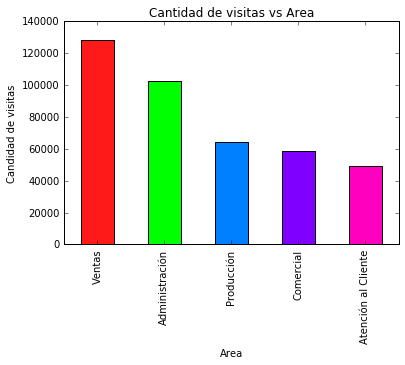

In [11]:
vistas_all["nombre_area"].value_counts().head().plot(kind='bar',
                                                     color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf'])
plt.title("Cantidad de visitas vs Area")
plt.xlabel("Area")
plt.ylabel("Candidad de visitas")

### Top 10 de los avisos mas vistos

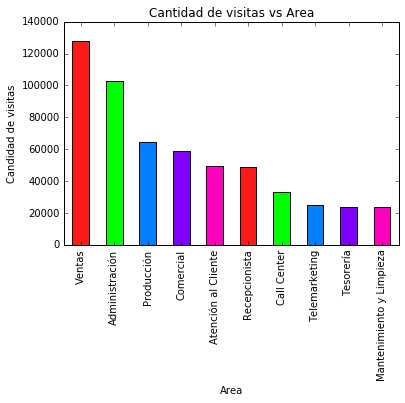

In [12]:
vistas_all["nombre_area"].value_counts().head(10).plot(kind='bar',  
                                                     color = ['#ff1a1a', '#00ff00', '#0080ff', '#8000ff', '#ff00bf'])
plt.title("Cantidad de visitas vs Area")
plt.xlabel("Area")
plt.ylabel("Candidad de visitas")

### Top 10 de los avisos mas visitados por empresa

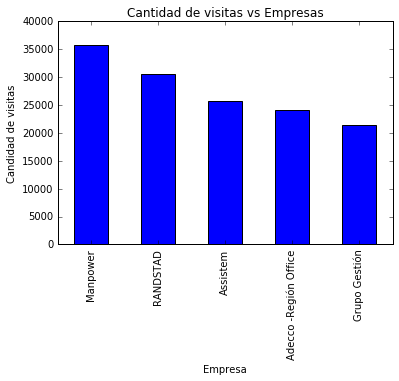

In [13]:
vistas_all["denominacion_empresa"].value_counts().head().plot(kind='bar')
plt.title("Cantidad de visitas vs Empresas")
plt.xlabel("Empresa")
plt.ylabel("Candidad de visitas")

#### ¿Cuál de los 2 meses tiene mas cantidad de visitas?

In [40]:
vistas.loc[:,["idAviso","timestamp"]].groupby(vistas["timestamp"].dt.month).size()

timestamp
2    921074
3     40823
dtype: int64

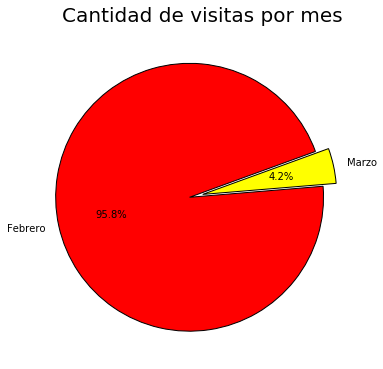

In [59]:
sizes = [vistas[vistas["timestamp"].dt.month==2]["timestamp"].count(), vistas[vistas["timestamp"].dt.month==3]["timestamp"].count()]
nombres = ['Febrero', 'Marzo']

plt.figure(figsize=(6, 6))
plt.title('Cantidad de visitas por mes', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()

### Cantidad de visitas según su Estado 

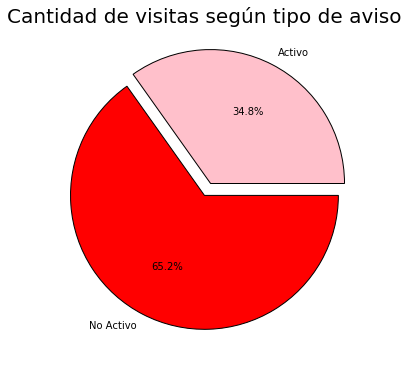

In [53]:
sizes = [avisos[avisos["online"]==True]["online"].count(), avisos[avisos["online"]==False]["online"].count()]
nombres = ['Activo', 'No Activo']

plt.figure(figsize=(6, 6))
plt.title('Cantidad de visitas según tipo de aviso', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', colors=['pink', 'red'], explode=(0.1, 0))
plt.show()

#### Existen muchos anuncios no activos asi que analizamos que pasa si descartamos los no activos a la hora de analizar que mes tiene mas cantidad de visitas

In [67]:
avisos_online["online"] = True 
vistas_activas = vistas.join(avisos_online.set_index("idaviso"), on="idAviso", how='inner')

In [76]:
vistas_activas

,idAviso,timestamp,idpostulante,online
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z,True
22,1111780242,2018-02-23 18:39:03.119,dYjRpMD,True
471,1111780242,2018-02-23 18:43:52.058,wVopPXl,True
490,1111780242,2018-02-23 18:45:06.956,wVopPXl,True
720,1111780242,2018-02-23 18:40:23.265,wVoOPoL,True
1067,1111780242,2018-02-23 18:39:04.385,dYjRpMD,True
1753,1111780242,2018-02-23 18:40:37.567,wVoOPoL,True
2095,1111780242,2018-02-23 18:40:36.307,wVoOPoL,True
3461,1111780242,2018-02-23 19:00:58.249,KBdJJKd,True
4772,1111780242,2018-02-23 19:20:05.713,3N2brQK,True


#### Deducimos que el data set de vistas sólo posee datos activos 

## Analizamos el set de datos de los postulantes

### Evaluamos si los postulantes poseen datos validos

In [6]:
postulantes = postulantes_genero_edad
postulantes["fechanacimiento"] = pd.to_datetime(postulantes["fechanacimiento"], errors='coerce')
postulantes["fechanacimiento"].sort_values()

154559   1775-07-09
164618   1917-07-08
156483   1921-08-18
83825    1939-07-27
99345    1941-09-21
55962    1942-07-16
15039    1942-08-21
199706   1942-12-19
25080    1943-02-07
17969    1943-03-17
11671    1944-03-23
64272    1944-08-02
98648    1944-11-13
44744    1946-06-16
520      1946-12-03
63142    1947-01-21
52616    1947-06-30
97800    1947-07-12
41689    1947-07-27
49323    1947-10-13
145374   1947-11-27
115060   1947-12-04
80254    1948-01-31
1440     1948-05-14
84750    1948-06-23
108855   1948-07-01
135106   1948-07-10
3784     1948-08-01
5274     1948-10-04
3750     1948-10-04
            ...    
200597          NaT
200598          NaT
200604          NaT
200607          NaT
200609          NaT
200614          NaT
200616          NaT
200630          NaT
200650          NaT
200652          NaT
200673          NaT
200676          NaT
200703          NaT
200710          NaT
200728          NaT
200733          NaT
200763          NaT
200770          NaT
200779          NaT


In [7]:
postulantes_invalidos = postulantes.loc[-((postulantes["fechanacimiento"].dt.year > 1953)
                                          &(postulantes["fechanacimiento"].dt.year<2000))]
postulantes_invalidos.head()

,idpostulante,fechanacimiento,sexo
287,aXm1J,1952-04-16,MASC
302,eV1jp,1950-11-28,MASC
303,ZLwmV,1953-12-22,FEM
520,52DWRk,1946-12-03,MASC
529,Y06KOr,1952-01-08,MASC


In [8]:
postulantes = postulantes.loc[((postulantes["fechanacimiento"].dt.year > 1953)
                             &(postulantes["fechanacimiento"].dt.year<2000))]
postulantes.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


#### Consideramos como tope la edad de jubilación (65 años) como fecha de nacimiento válida para un postulante y como mínimo la de la mayoría de edad (18 años)

In [9]:
postulantes["idpostulante"].describe()

count      195390
unique     195390
top       A3vRwKL
freq            1
Name: idpostulante, dtype: object

In [10]:
postulantes.groupby("idpostulante").size().sort_values()

idpostulante
0z5VvGv    1
aDK4Nm     1
aDL6zm     1
aDL9N      1
aDN5ED     1
aDNA6N     1
aDPrJ9     1
aDRx3Z     1
aDVeb0     1
aDVq2J     1
aDWdrJ     1
aDXNaN     1
aDXXe9     1
aDXbzW     1
aDXeaJ     1
aDYN9W     1
aDb92N     1
aDkQQ5     1
aDmQem     1
aDrxVJ     1
aDJzQq     1
aDD1xZ     1
aDBNB9     1
aDAaYN     1
aBm4vm     1
aBmAxq     1
aBmeVJ     1
aBp6B0     1
aBpLo9     1
aBpMkW     1
          ..
Eze9dR2    1
Eze9dWz    1
Eze9e5o    1
Eze9e9o    1
Eze9Zjz    1
Eze9Jl2    1
Eze9Rq2    1
Eze9R3J    1
Eze9KA9    1
Eze9L0J    1
Eze9LA0    1
Eze9LE9    1
Eze9LN8    1
Eze9Ll9    1
Eze9Lo9    1
Eze9M02    1
Eze9MJ4    1
Eze9RP9    1
Eze9N16    1
Eze9NQz    1
Eze9Np0    1
Eze9O52    1
Eze9OV8    1
Eze9Olo    1
Eze9PA8    1
Eze9PON    1
Eze9PV4    1
Eze9Q4b    1
Eze9NL6    1
zvxzrWm    1
dtype: int64

#### Vemos si los avisos son visitados por postulantes válidos

In [11]:
postulantes_invalidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5498 entries, 287 to 200887
Data columns (total 3 columns):
idpostulante       5498 non-null object
fechanacimiento    741 non-null datetime64[ns]
sexo               5498 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 171.8+ KB


In [12]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195390 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       195390 non-null object
fechanacimiento    195390 non-null datetime64[ns]
sexo               195390 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


In [42]:
vistas["timestamp"] = pd.to_datetime(vistas["timestamp"], errors='coerce')
vistas[vistas["timestamp"].dt.month == 3]["nombre_area"].value_counts()

Ventas                                   6179
Administración                           4393
Recepcionista                            2882
Producción                               2742
Comercial                                2288
Atención al Cliente                      1818
Telemarketing                            1219
Call Center                              1172
Mantenimiento y Limpieza                  917
Tesorería                                 789
Recursos Humanos                          782
Gastronomia                               721
Administración de Personal                690
Camareros                                 688
Contabilidad                              642
Secretaria                                545
Otros                                     515
Farmacéutica                              509
Almacén / Depósito / Expedición           474
Salud                                     472
Compras                                   391
Oficios y Profesiones             

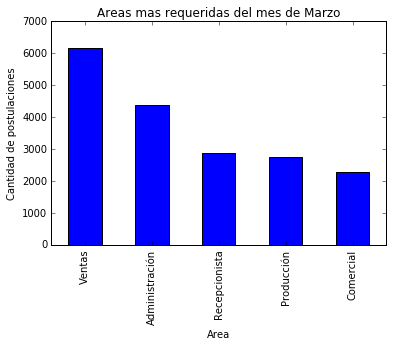

In [36]:
## Avisos mas visitados en el Mes de Marzo
## vistas = vistas.join(avisos.set_index("idaviso"), on="idAviso", how="inner")
vistas_marzo = vistas.loc[:,["nombre_area","timestamp"]]
vistas_marzo["timestamp"] = pd.to_datetime(vistas_marzo["timestamp"], errors='coerce')
vistas_marzo = vistas_marzo[vistas_marzo["timestamp"].dt.month == 3]
vistas_marzo["nombre_area"].value_counts().head().plot(kind="bar", title="Areas mas requeridas del mes de Marzo")
plt.xlabel("Area")
plt.ylabel("Cantidad de postulaciones")

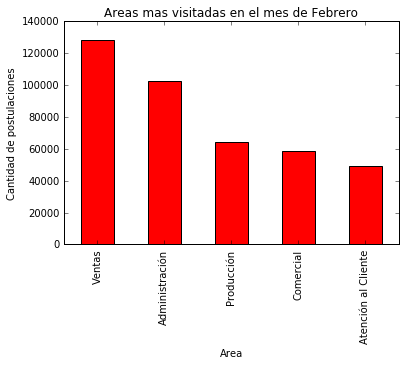

In [44]:
## Avisos mas visitados segun el área del mes de Febrero
vistas_febrero = vistas[vistas["timestamp"].dt.month == 2]
vistas_febrero = vistas.loc[:,["nombre_area","timestamp"]]
vistas_febrero["nombre_area"].value_counts().head().plot(kind="bar", color='red')
plt.title("Areas mas visitadas en el mes de Febrero")
plt.xlabel("Area")
plt.ylabel("Cantidad de postulaciones")

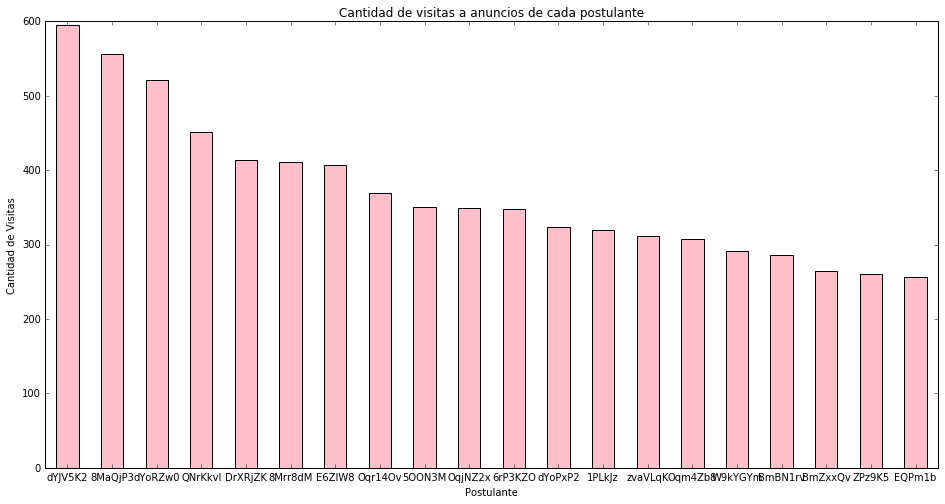

In [49]:
##cantidad de avisos vistos por cada postulante
vistas["idpostulante"].value_counts().head(20).plot(kind='bar', rot=0, color = 'pink',
                                                    figsize=(16,8),
                                           title='Cantidad de visitas a anuncios de cada postulante')
plt.xlabel("Postulante")
plt.ylabel("Cantidad de Visitas")

#### Solo representamos el id del postulante


Esto serviria a la hora de saber a que postulante mandarle mas avisos, cual está mas pendiente o más conectado



### Vamos a ver la cantidad de visitas según el dia del mes

In [9]:
vistas["timestamp"] = pd.to_datetime(vistas["timestamp"], errors='coerce')

In [35]:
vistas["timestamp"].dt.day.value_counts()

27    232145
26    227957
28    227160
24     95930
25     90646
23     47236
1      40823
Name: timestamp, dtype: int64

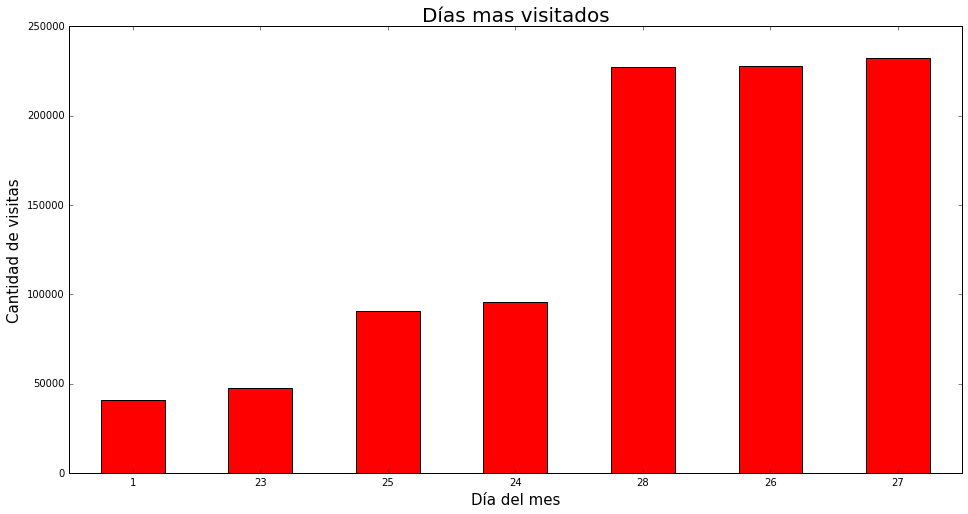

In [63]:
vistas["timestamp"].dt.day.value_counts().sort_values().plot(kind='bar', figsize=(16,8), rot=0, color='red')
plt.title("Días mas visitados", fontsize=20)
plt.xlabel("Día del mes", fontsize= 15)
plt.ylabel("Cantidad de visitas", fontsize= 15)

#### Como se puede observar en el gráfico a fin de mes son los días que mas se visitan los anuncios de trabajo. Por ende si se quiere activar/lanzar un aviso es preferible que se realice a fines de mes para que no se pierda entre los más viejos, si es que se muestran los anuncios nuevos al comienzo de la búsqueda